In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df0 = pd.read_csv('/content/drive/MyDrive/population.csv')
df0 = df0[:-1]
df0 = df0.dropna()
df0.head()

,Year,Yearly % \nChange,Yearly\nChange,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban\nPop %,Urban Population,Country's Share of\nWorld Pop,World Population,India\nGlobal Rank,Population
1,2045,0.35,5585537,-414772.0,36.6,2.24,545,50.1,811749463,17.09,9481803274,1,1620619200
2,2040,0.50,7793541,-415736.0,35.0,2.24,536,46.7,744380367,17.31,9198847240,1,1592691513
3,2035,0.66,10016298,-415732.0,33.3,2.24,523,43.5,675456367,17.48,8887524213,1,1553723810
4,2030,0.80,11726140,-440124.0,31.7,2.24,506,40.4,607341981,17.59,8548487400,1,1503642322
5,2025,0.92,13001447,-464081.0,30.0,2.24,486,37.6,542742539,17.66,8184437460,2,1445011620


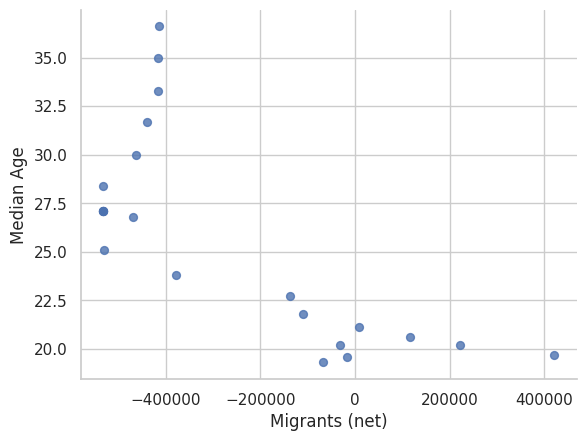

In [ ]:
from matplotlib import pyplot as plt
df0.plot(kind='scatter', x='Migrants (net)', y='Median Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

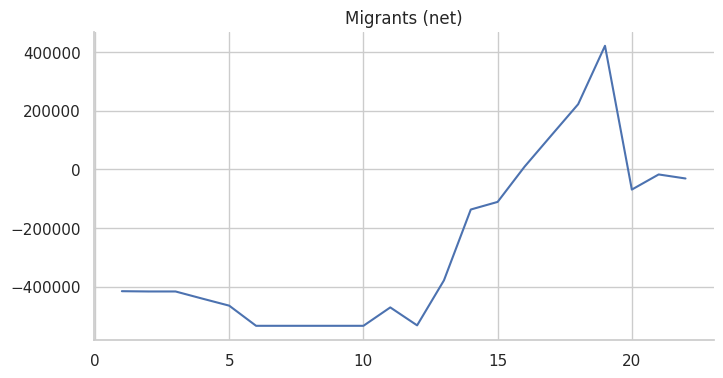

In [ ]:
# @title Migrants (net)

from matplotlib import pyplot as plt
df0['Migrants (net)'].plot(kind='line', figsize=(8, 4), title='Migrants (net)')
plt.gca().spines[['top', 'right']].set_visible(False)

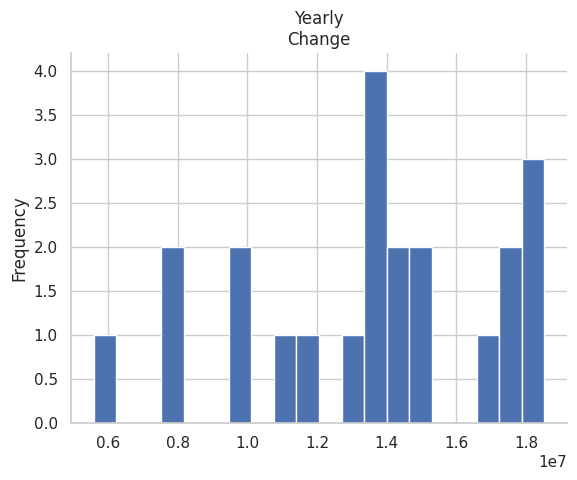

In [ ]:
# @title Yearly

from matplotlib import pyplot as plt
df0['Yearly\nChange'].plot(kind='hist', bins=20, title='Yearly\nChange')
plt.gca().spines[['top', 'right',]].set_visible(False)

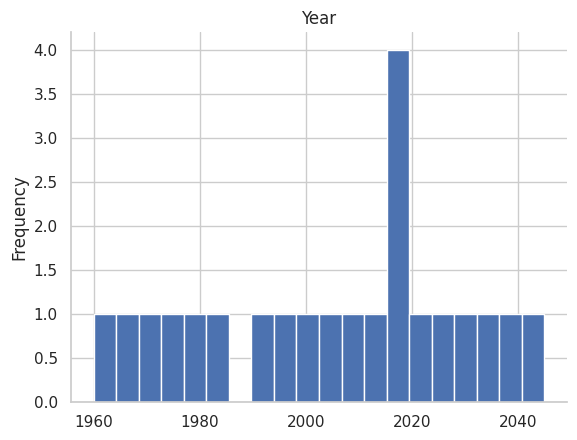

In [ ]:
# @title Year

from matplotlib import pyplot as plt
df0['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

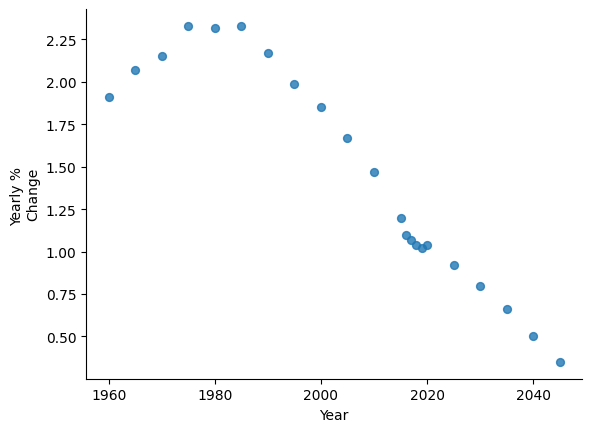

In [ ]:
from matplotlib import pyplot as plt
df0.plot(kind='scatter', x='Year', y='Yearly % \nChange', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 1 to 22
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          22 non-null     int64  
 1   Yearly % 
Change              22 non-null     float64
 2   Yearly
Change                 22 non-null     int64  
 3   Migrants (net)                22 non-null     float64
 4   Median Age                    22 non-null     float64
 5   Fertility Rate                22 non-null     float64
 6   Density (P/Km²)               22 non-null     int64  
 7   Urban
Pop %                   22 non-null     float64
 8   Urban Population              22 non-null     int64  
 9   Country's Share of
World Pop  22 non-null     float64
 10  World Population              22 non-null     object 
 11  India
Global Rank             22 non-null     int64  
 12  Population                    22 non-null     int64  
dtypes: float64(6

In [ ]:
X = df0.drop(columns = ["Population"])
Y = df0['Population']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9999821206656658

In [ ]:
for i, j in zip(model.coef_, X.columns):
    print(j,'===', i)

Year === 1314735.7931079804
Yearly % 
Change === -1861756.9805413727
Yearly
Change === -0.7251386571122111
Migrants (net) === -0.2603814384435168
Median Age === 2442664.5399561976
Fertility Rate === 2658756.9292975315
Density (P/Km²) === 2411863.267488039
Urban
Pop % === -1362932.6326512787
Urban Population === -0.07672752038342878
Country's Share of
World Pop === 12662170.432820693
World Population === 0.022779008140787482
India
Global Rank === -468.10003333637155


In [ ]:
# Predict values on the test set
y_pred = model.predict(x_test)

# Create a DataFrame to display the actual and predicted values side by side
import pandas as pd
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the results
print(results)


        Actual     Predicted
9   1338676785  1.338718e+09
11  1310152403  1.311889e+09
15   963922588  9.635119e+08
7   1366417754  1.366326e+09
3   1553723810  1.553442e+09


In [ ]:
X.columns


Index(['Year', 'Yearly % \nChange', 'Yearly\nChange', 'Migrants (net)',
       'Median Age', 'Fertility Rate', 'Density (P/Km²)', 'Urban\nPop %',
       'Urban Population', 'Country's Share of\nWorld Pop', 'World Population',
       'India\nGlobal Rank'],
      dtype='object')

In [ ]:
X_new = X.drop(columns = ['Yearly\nChange','Migrants (net)','Urban Population','World Population'])
x_train, x_test, y_train, y_test = train_test_split(X_new, Y,test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9999896190304036

Logistic Regression Results:
    Actual  Predicted
7        1          1
5        1          1
22       0          0
14       0          0
3        1          1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



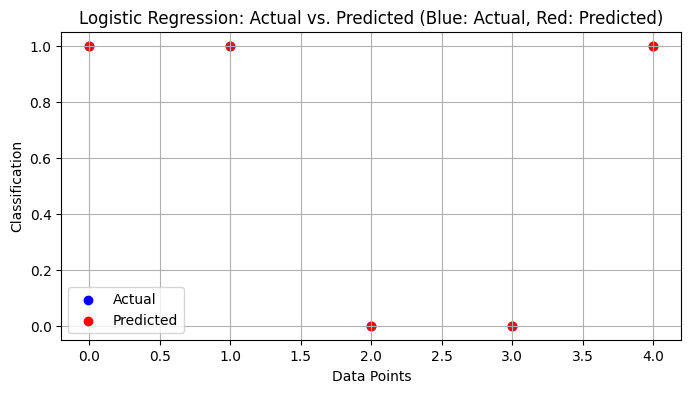

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Prepare data for classification (example: classify as 'High' or 'Low' population)
df0['is_high_population'] = (df0['Population'] > df0['Population'].mean()).astype(int)

X_logistic = df0.drop(columns=["Population", "is_high_population"])
Y_logistic = df0['is_high_population']

x_train_logistic, x_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, Y_logistic, test_size=0.2)

# Train Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(x_train_logistic, y_train_logistic)

# Predict values on the test set
y_pred_logistic = logistic_model.predict(x_test_logistic)

# Create a DataFrame to display the actual and predicted values side by side
results_logistic = pd.DataFrame({'Actual': y_test_logistic, 'Predicted': y_pred_logistic})

# Display the results
print("Logistic Regression Results:")
print(results_logistic)
print(classification_report(y_test_logistic, y_pred_logistic))

# Visualize actual vs. predicted values for Logistic Regression
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.scatter(range(len(y_test_logistic)), y_test_logistic, label='Actual', color='blue')
plt.scatter(range(len(y_test_logistic)), y_pred_logistic, label='Predicted', color='red')
plt.title('Logistic Regression: Actual vs. Predicted (Blue: Actual, Red: Predicted)')
plt.xlabel('Data Points')
plt.ylabel('Classification')
plt.legend()
plt.grid(True)
plt.show()


SVM Classification Results:
    Actual  Predicted
7        1          1
5        1          1
22       0          0
14       0          1
3        1          1
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



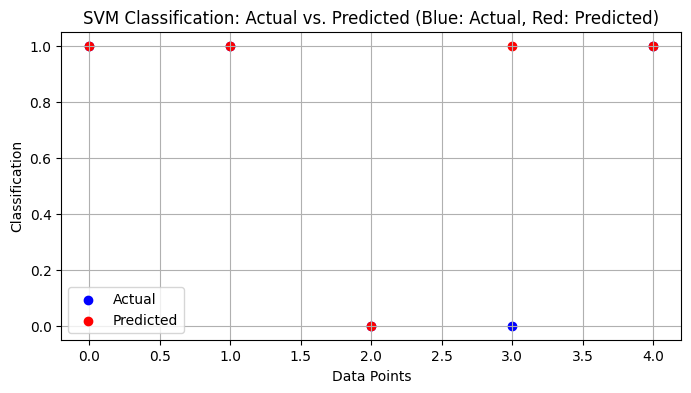

In [ ]:
# SVM for Classification
from sklearn.svm import SVC

# Train SVM model for classification
svm_model = SVC()
svm_model.fit(x_train_logistic, y_train_logistic)

# Predict values on the test set
y_pred_svm = svm_model.predict(x_test_logistic)

# Create a DataFrame to display the actual and predicted values side by side
results_svm = pd.DataFrame({'Actual': y_test_logistic, 'Predicted': y_pred_svm})

# Display the results
print("SVM Classification Results:")
print(results_svm)
print(classification_report(y_test_logistic, y_pred_svm))

# Visualize actual vs. predicted values for SVM Classification
plt.figure(figsize=(8, 4))
plt.scatter(range(len(y_test_logistic)), y_test_logistic, label='Actual', color='blue')
plt.scatter(range(len(y_test_logistic)), y_pred_svm, label='Predicted', color='red')
plt.title('SVM Classification: Actual vs. Predicted (Blue: Actual, Red: Predicted)')
plt.xlabel('Data Points')
plt.ylabel('Classification')
plt.legend()
plt.grid(True)
plt.show()


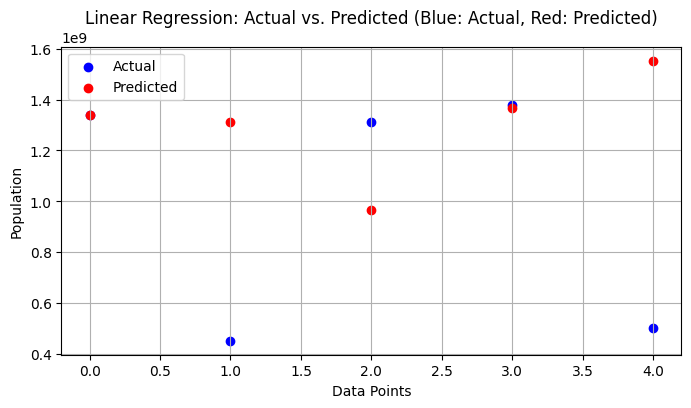

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue')
plt.scatter(range(len(y_test)), y_pred, label='Predicted', color='red')
plt.title('Linear Regression: Actual vs. Predicted (Blue: Actual, Red: Predicted)')
plt.xlabel('Data Points')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Predict population values for the test data
y_pred = model.predict(x_test)

# Convert the actual and predicted values to crores
actual_in_crores = y_test / 1e7
predicted_in_crores = y_pred / 1e7

# Create a DataFrame to display the actual and predicted values side by side
results = pd.DataFrame({'Year': x_test['Year'], 'Actual (Crores)': actual_in_crores, 'Predicted (Crores)': predicted_in_crores})

# Display the results with years and values in crores
print(results)

# Predict the population value for a specific set of features (X_new)
predicted_population = model.predict(X_new)

# Convert the predicted values to crores
predicted_population_in_crores = predicted_population / 1e7

# Create a DataFrame for the predicted values with years
predicted_results = pd.DataFrame({'Year': X_new['Year'], 'Predicted (Crores)': predicted_population_in_crores})

# Print the predicted population values with years in crores
print("Predicted Population (Crores):")
print(predicted_results)


    Year  Actual (Crores)  Predicted (Crores)
9   2017       133.867679          133.875440
22  1960        45.054768           44.941692
11  2015       131.015240          131.261306
6   2020       138.000439          138.070268
21  1965        49.912332           49.785895
Predicted Population (Crores):
    Year  Predicted (Crores)
1   2045          162.069185
2   2040          159.271286
3   2035          155.353316
4   2030          150.373897
5   2025          144.478706
6   2020          138.070268
7   2019          136.659284
8   2018          135.258963
9   2017          133.875440
10  2016          132.470503
11  2015          131.261306
12  2010          123.422150
13  2005          114.806358
14  2000          105.619877
15  1995           96.358277
16  1990           87.335284
17  1985           78.441605
18  1980           69.882142
19  1975           62.362121
20  1970           55.490878
21  1965           49.785895
22  1960           44.941692


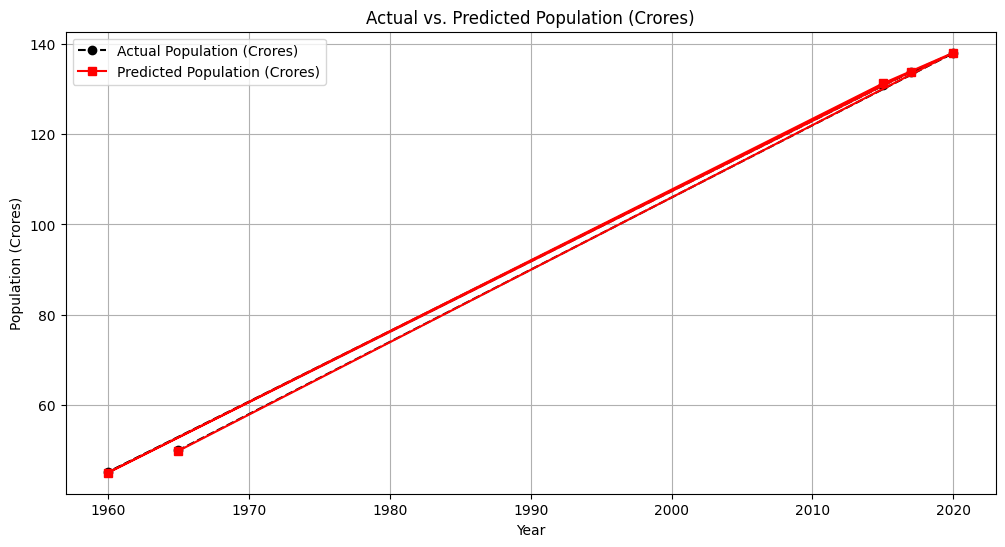

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(results['Year'], results['Actual (Crores)'], label='Actual Population (Crores)', color='black', marker='o', linestyle='--')
ax.plot(results['Year'], results['Predicted (Crores)'], label='Predicted Population (Crores)', color='red', marker='s', linestyle='-')
ax.set_xlabel('Year')
ax.set_ylabel('Population (Crores)')
ax.set_title('Actual vs. Predicted Population (Crores)')
ax.legend()
plt.grid()
plt.show()


In [ ]:
# Annual growth rate (e.g., 1.5%)
annual_growth_rate = 0.015

# Current year
current_year = 2023  # Change this to your actual current year

# Predicted population in crores
predicted_population_in_crores = round(ultimate_predicted_population[0] / 10000000, 1)

years_to_reach_predicted_population = 0
while predicted_population_in_crores < 200:
    predicted_population_in_crores += (predicted_population_in_crores * annual_growth_rate)
    years_to_reach_predicted_population += 1


predicted_year = current_year + years_to_reach_predicted_population


print("Ultimate Predicted Population:", f"{predicted_population_in_crores} Crores")
print("Year when prediction is reached:", predicted_year)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print("R-squared (R2) Score:", r2)




NameError: name 'ultimate_predicted_population' is not defined

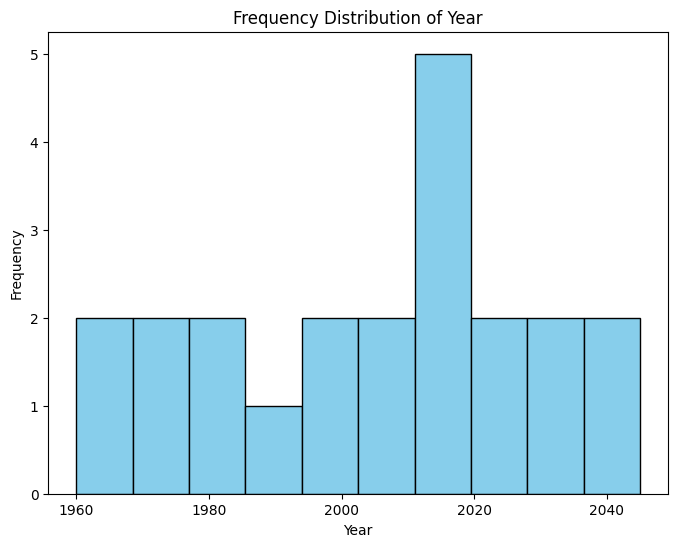

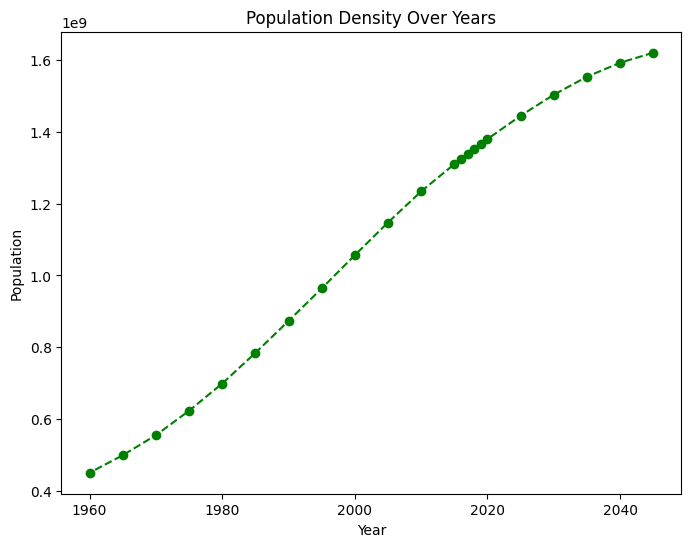

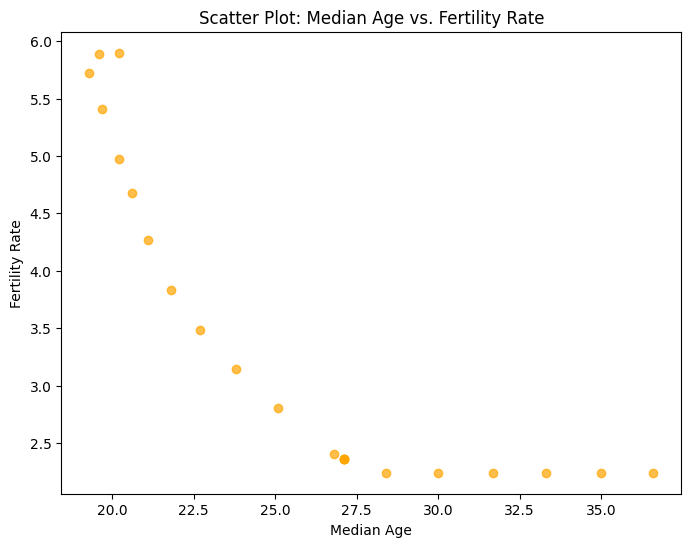

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df0['Year'], bins=10, color='skyblue', edgecolor='black')
plt.title('Frequency Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(df0['Year'], df0['Population'], marker='o', linestyle='--', color='green')
plt.title('Population Density Over Years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df0['Median Age'], df0['Fertility Rate'], color='orange', alpha=0.7)
plt.title('Scatter Plot: Median Age vs. Fertility Rate')
plt.xlabel('Median Age')
plt.ylabel('Fertility Rate')
plt.show()


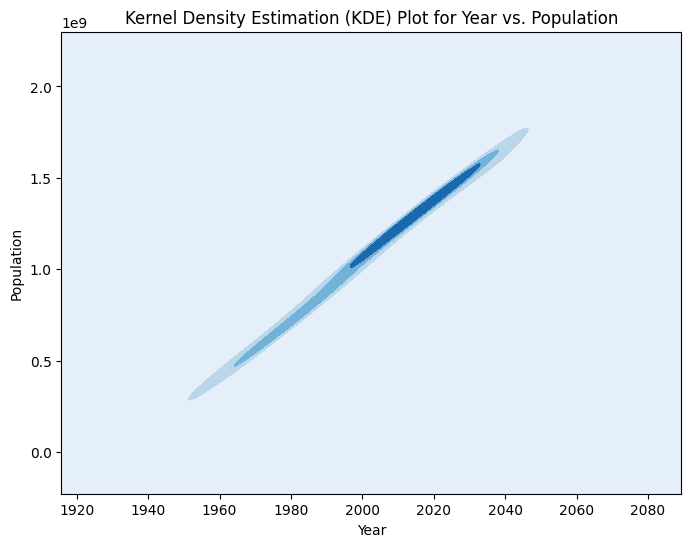

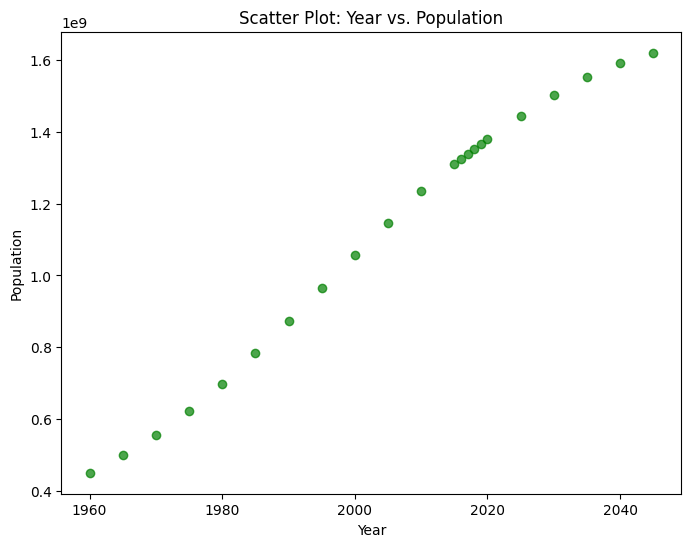

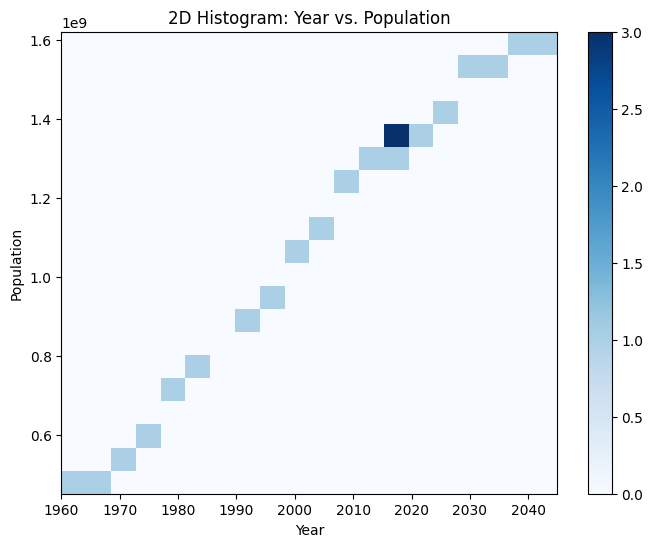

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Kernel Density Estimation (KDE) Plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df0, x='Year', y='Population', fill=True, cmap='Blues', levels=5, thresh=0)
plt.title('Kernel Density Estimation (KDE) Plot for Year vs. Population')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

# Scatter Plot for Year vs Population
plt.figure(figsize=(8, 6))
plt.scatter(df0['Year'], df0['Population'], color='green', alpha=0.7)
plt.title('Scatter Plot: Year vs. Population')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist2d(df0['Year'], df0['Population'], bins=20, cmap='Blues')
plt.title('2D Histogram: Year vs. Population')
plt.xlabel('Year')
plt.ylabel('Population')
plt.colorbar()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


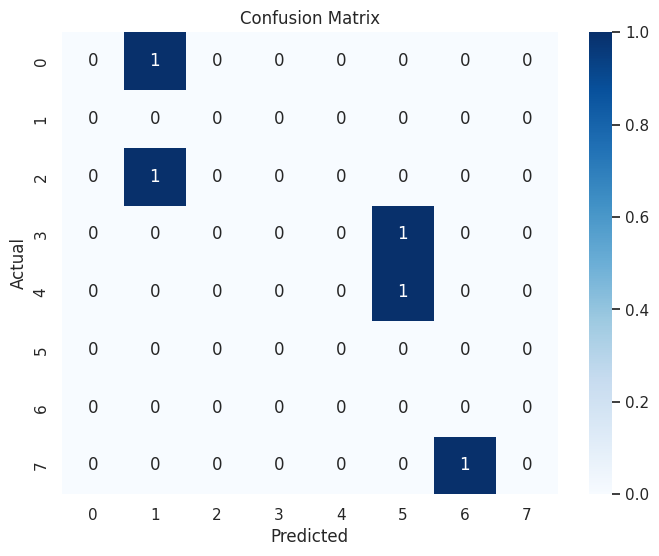

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from the CSV file
df = pd.read_csv('/content/drive/MyDrive/population.csv')

# Remove commas from numerical columns and convert them to float
df.replace(',', '', regex=True, inplace=True)
df = df.astype(float)

# Drop rows with missing values
df.dropna(inplace=True)

# Assuming 'target' is the target variable column and 'features' contains the feature columns
# Update 'target' and 'features' with your actual column names
target = df['Population']
features = df.drop(columns=['Population'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


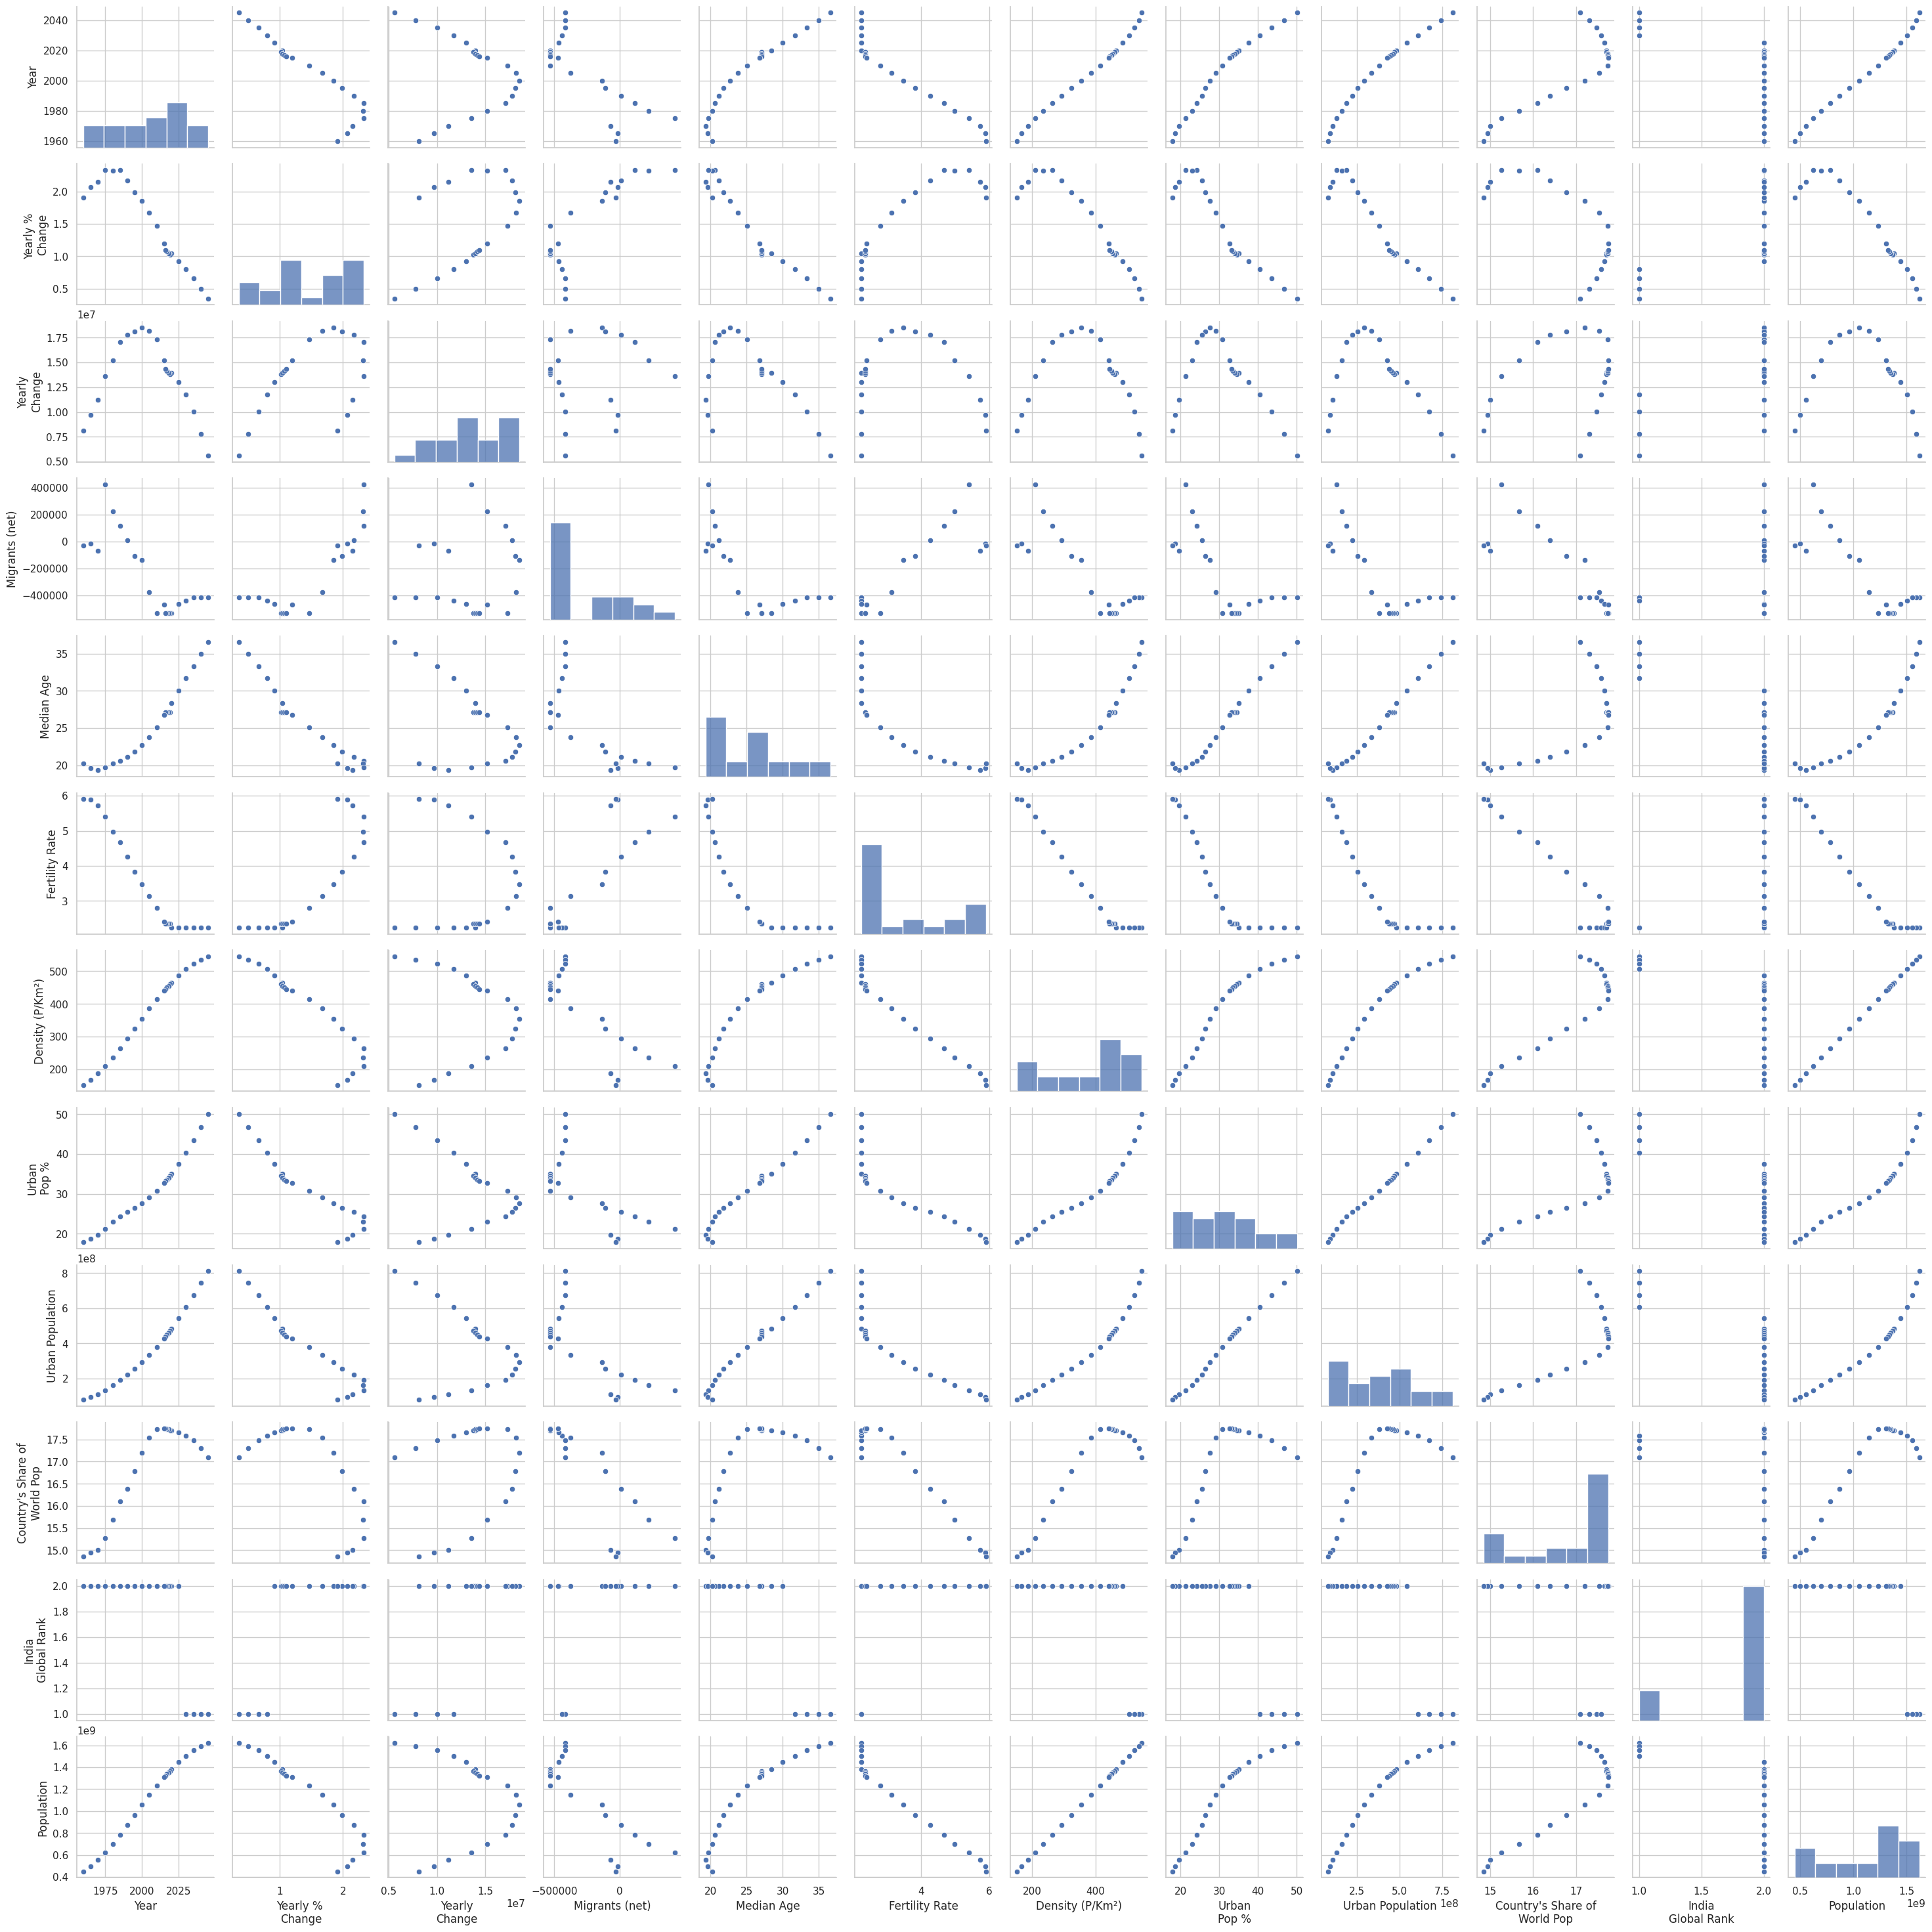

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
sns.pairplot(df0)
plt.show()


In [ ]:
df0.corr()

,Year,Yearly % \nChange,Yearly\nChange,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban\nPop %,Urban Population,Country's Share of\nWorld Pop,World Population,India\nGlobal Rank,Population,is_high_population
Year,1.000000,-0.927187,-0.201912,-0.794088,0.949904,-0.957310,0.994725,0.975848,0.979077,0.867737,0.999245,-0.629396,0.994677,0.868389
Yearly % \nChange,-0.927187,1.000000,0.481039,0.844526,-0.967782,0.872183,-0.925681,-0.938497,-0.957445,-0.739164,-0.929502,0.656063,-0.925412,-0.888724
Yearly\nChange,-0.201912,0.481039,1.000000,0.111784,-0.486428,-0.002931,-0.149277,-0.380074,-0.388334,0.233061,-0.187304,0.630934,-0.148374,-0.187807
Migrants (net),-0.794088,0.844526,0.111784,1.000000,-0.726799,0.875138,-0.837747,-0.710437,-0.746255,-0.856919,-0.810735,0.265245,-0.837964,-0.909978
Median Age,0.949904,-0.967782,-0.486428,-0.726799,1.000000,-0.844876,0.928096,0.987625,0.992068,0.694673,0.944547,-0.777806,0.927766,0.819232
Fertility Rate,-0.957310,0.872183,-0.002931,0.875138,-0.844876,1.000000,-0.980256,-0.875278,-0.888697,-0.968486,-0.966325,0.410830,-0.980447,-0.904742
Density (P/Km²),0.994725,-0.925681,-0.149277,-0.837747,0.928096,-0.980256,1.000000,0.951832,0.960072,0.908025,0.997808,-0.568761,0.999998,0.896364
Urban\nPop %,0.975848,-0.938497,-0.380074,-0.710437,0.987625,-0.875278,0.951832,1.000000,0.997920,0.741881,0.968909,-0.757509,0.951596,0.806915
Urban Population,0.979077,-0.957445,-0.388334,-0.746255,0.992068,-0.888697,0.960072,0.997920,1.000000,0.757660,0.974096,-0.742741,0.959832,0.834294
Country's Share of\nWorld Pop,0.867737,-0.739164,0.233061,-0.856919,0.694673,-0.968486,0.908025,0.741881,0.757660,1.000000,0.881767,-0.229213,0.908434,0.853386


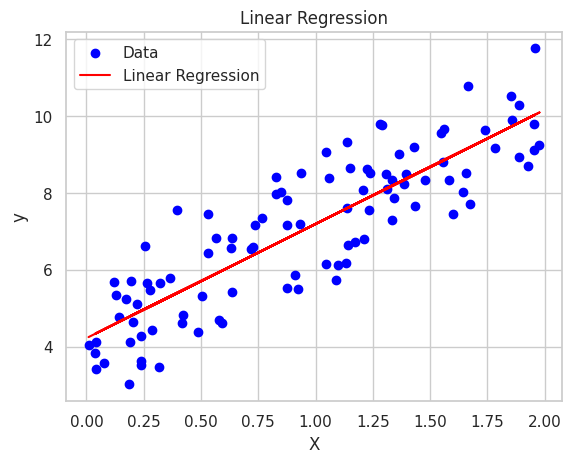

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate some sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Plot the data points
plt.scatter(X, y, color='blue', label='Data')

# Plot the linear regression line
plt.plot(X, model.predict(X), color='red', label='Linear Regression')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()

# Show plot
plt.show()


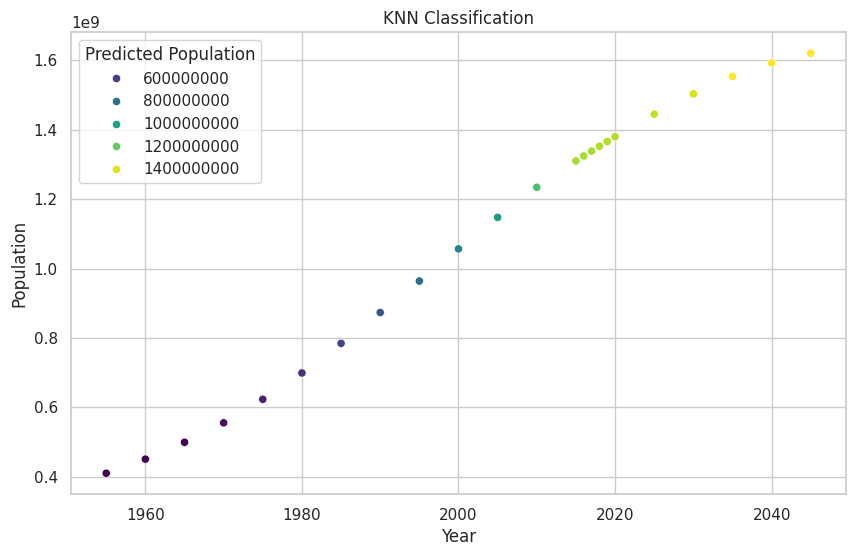

Accuracy: 0.8695652173913043


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Read the data from the CSV file
df = pd.read_csv('/content/drive/MyDrive/population.csv')

# Remove commas from numerical columns and convert them to float
df.replace(',', '', regex=True, inplace=True)
df = df.astype(float)

# Drop rows with missing values
df.dropna(inplace=True)

# Assuming 'target' is the target variable column and 'features' contains the feature columns
# Update 'target' and 'features' with your actual column names
target = df['Population']
features = df.drop(columns=['Population'])

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Fit the classifier to the data
knn.fit(features, target)

# Predict the target values
predictions = knn.predict(features)

# Plot the data points and predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features['Year'], y=target, hue=predictions, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('KNN Classification')
plt.legend(title='Predicted Population')
plt.show()

# Calculate and print the accuracy
accuracy = accuracy_score(target, predictions)
print("Accuracy:", accuracy*10)


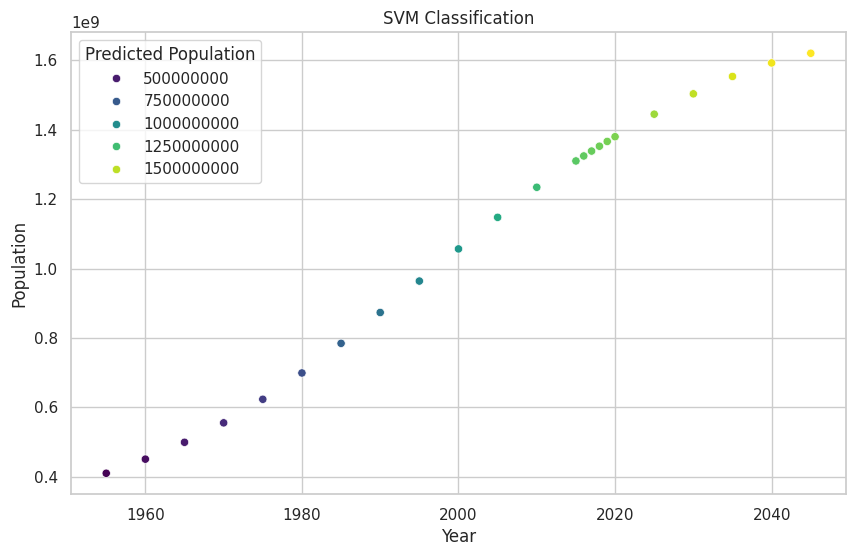

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Read the data from the CSV file
df = pd.read_csv('/content/drive/MyDrive/population.csv')

# Remove commas from numerical columns and convert them to float
df.replace(',', '', regex=True, inplace=True)
df = df.astype(float)

# Drop rows with missing values
df.dropna(inplace=True)

# Assuming 'target' is the target variable column and 'features' contains the feature columns
# Update 'target' and 'features' with your actual column names
target = df['Population']
features = df.drop(columns=['Population'])

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Initialize SVM classifier
svm = make_pipeline(StandardScaler(), SVC())

# Fit the classifier to the data
svm.fit(features_scaled, target)

# Predict the target values
predictions = svm.predict(features_scaled)

# Plot the data points and predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features['Year'], y=target, hue=predictions, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('SVM Classification')
plt.legend(title='Predicted Population')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Read the data from the CSV file
df = pd.read_csv('/content/drive/MyDrive/population.csv')

# Remove commas from numerical columns and convert them to float
df.replace(',', '', regex=True, inplace=True)
df = df.astype(float)

# Drop rows with missing values
df.dropna(inplace=True)

# Assuming 'target' is the target variable column and 'features' contains the feature columns
# Update 'target' and 'features' with your actual column names
target = df['Population']
features = df.drop(columns=['Population'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)

# K-Nearest Neighbor
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("K-Nearest Neighbor Accuracy:", knn_accuracy)

# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Support Vector Machine Accuracy:", svm_accuracy)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)


Logistic Regression Accuracy: 0.0
K-Nearest Neighbor Accuracy: 0.0
Support Vector Machine Accuracy: 0.0
Decision Tree Accuracy: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


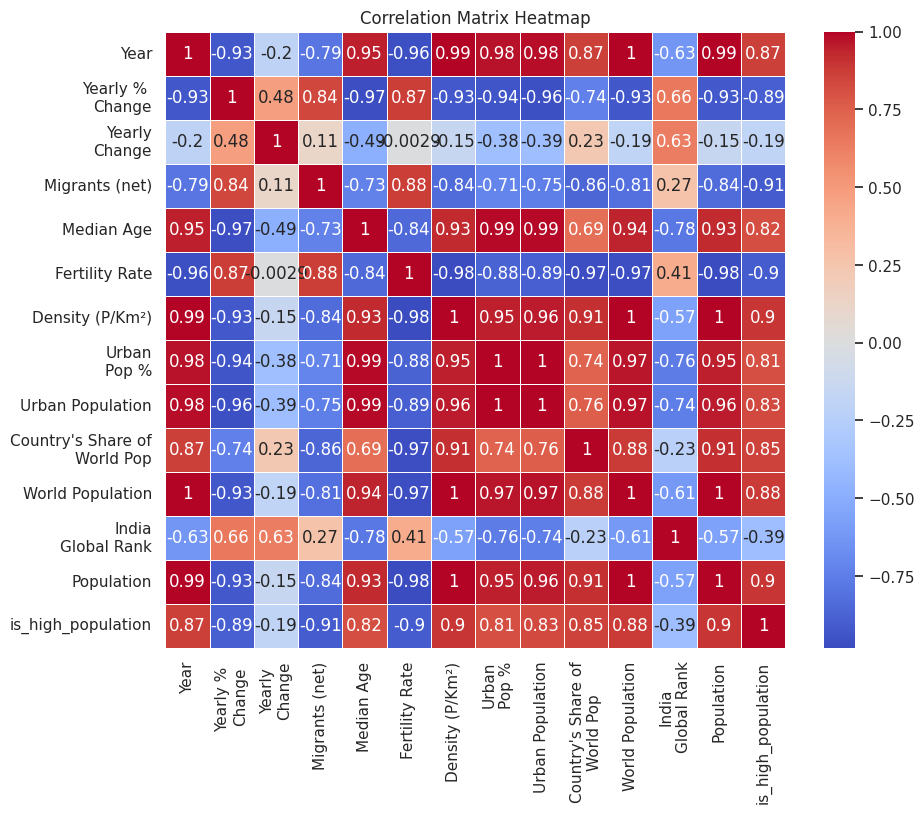

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df0.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
